# Real Estate - NYC  Neighbourhood Mean Rental Value Prediction

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 450
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
train_df = pd.read_csv('neighbourhood_data.csv')
districts = pd.read_csv('districts_data_cleaned.csv')
names = list(districts['name'].unique())
train_df = train_df[train_df['neighbourhood'].isin(names)]
counts = train_df['neighbourhood'].value_counts()
count_list = counts[counts > 50].index.tolist()
train_df = train_df[train_df['neighbourhood'].isin(count_list)]


train_df = train_df.loc[:, ~train_df.columns.str.contains('^Unnamed')]
train_df = train_df.astype({'bathrooms': 'int64'})
train_df = train_df.astype({'bedrooms': 'int64'})
train_df = train_df.astype({'interest_level': 'category'})
train_df = train_df.astype({'num_photos': 'int64'})
train_df = train_df.astype({'num_features': 'int64'})
train_df = train_df.astype({'num_description_words': 'int64'})
train_df = train_df.astype({'created_month': 'category'})
train_df = train_df.astype({'created_day': 'category'})
train_df = train_df.astype({'neighbourhood': 'str'})
train_df = train_df.astype({'price': 'float64'})
non_standardized = train_df.copy()
train_df['price'] = (train_df['price'] - train_df['price'].mean()) / train_df['price'].std()
train_df.head()

,bathrooms,bedrooms,interest_level,num_photos,num_features,num_description_words,created_month,created_day,neighbourhood,price
0,1,1,medium,12,7,77,6,16,South Side,-0.065951
1,1,3,medium,5,0,95,6,24,East Williamsburg,-0.039170
2,3,3,low,11,2,205,6,28,Brooklyn Heights,0.132672
4,1,3,high,9,1,60,6,4,Sunset Park,-0.074878
6,2,3,low,8,8,183,6,24,Crown Heights,-0.036939


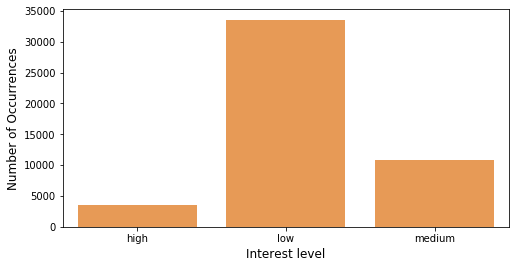

In [3]:
int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

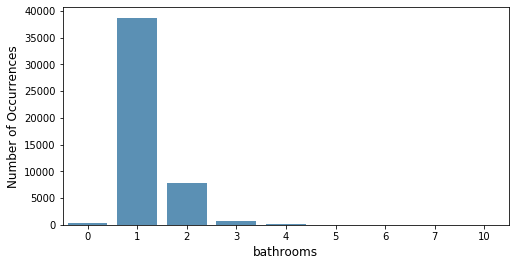

In [4]:
cnt_srs = train_df['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

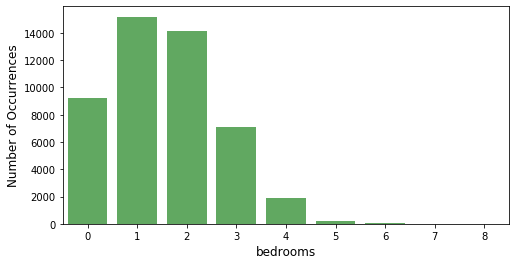

In [5]:
cnt_srs = train_df['bedrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

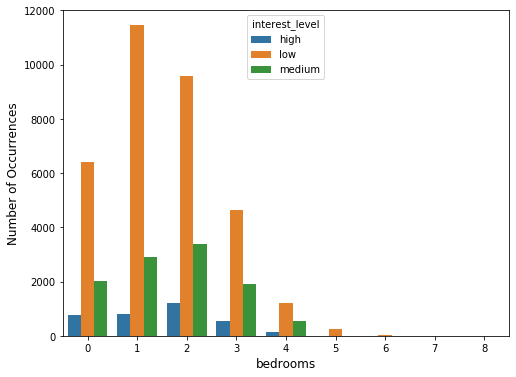

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

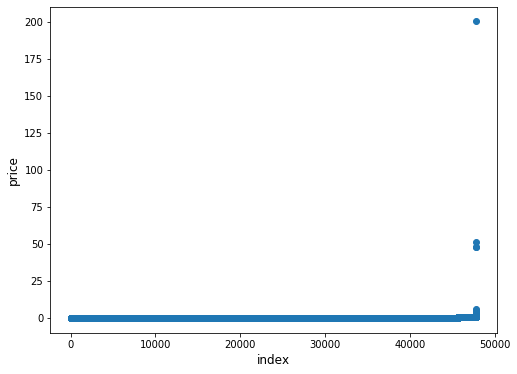

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


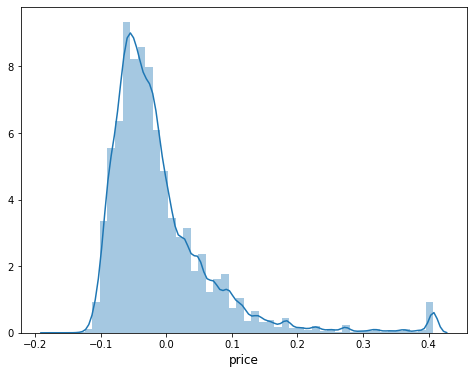

In [8]:
ulimit = np.percentile(train_df.price.values, 99)
train_df['price'].ix[train_df['price']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [9]:
# train_df[['price', 'boro_cd']].groupby(['boro_cd']).mean()

In [10]:
# train_df[['price', 'boro_cd']].groupby(['boro_cd']).std()

In [11]:
grouped = train_df[['price', 'neighbourhood']].groupby('neighbourhood', group_keys=False).apply(pd.DataFrame.sample, 5, replace = True)
print(grouped.groupby(['neighbourhood']).mean())
grouped.groupby(['neighbourhood']).std()

                              price
neighbourhood                      
Astoria                   -0.068629
Battery Park City          0.068104
Bay Ridge                 -0.079787
Bedford Stuyvesant        -0.062835
Boerum Hill               -0.029226
Brooklyn Heights          -0.034484
Bushwick                  -0.044571
Carnegie Hill             -0.047794
Carroll Gardens           -0.041848
Central Harlem            -0.063273
Chelsea                   -0.021852
Chinatown                 -0.056274
Civic Center              -0.023147
Clinton                   -0.037090
Clinton Hill              -0.027610
Cobble Hill                0.040234
Crown Heights             -0.026369
Downtown                  -0.036198
Dumbo                      0.009338
East Harlem               -0.049525
East Village               0.007874
East Williamsburg         -0.066933
Financial District        -0.042214
Flatbush                  -0.064835
Flatiron                   0.070853
Forest Hills              -0

,price
neighbourhood,
Astoria,0.033639
Battery Park City,0.134544
Bay Ridge,0.016934
Bedford Stuyvesant,0.022752
Boerum Hill,0.044318
Brooklyn Heights,0.036419
Bushwick,0.028113
Carnegie Hill,0.024238
Carroll Gardens,0.037821


In [12]:
import scikits.bootstrap as bootstrap 
df = train_df[['price', 'neighbourhood']]
X = df.groupby('neighbourhood').apply(lambda x:bootstrap.ci(x.values, np.mean))
X = X.values
X = np.array(list(X), dtype=np.float)

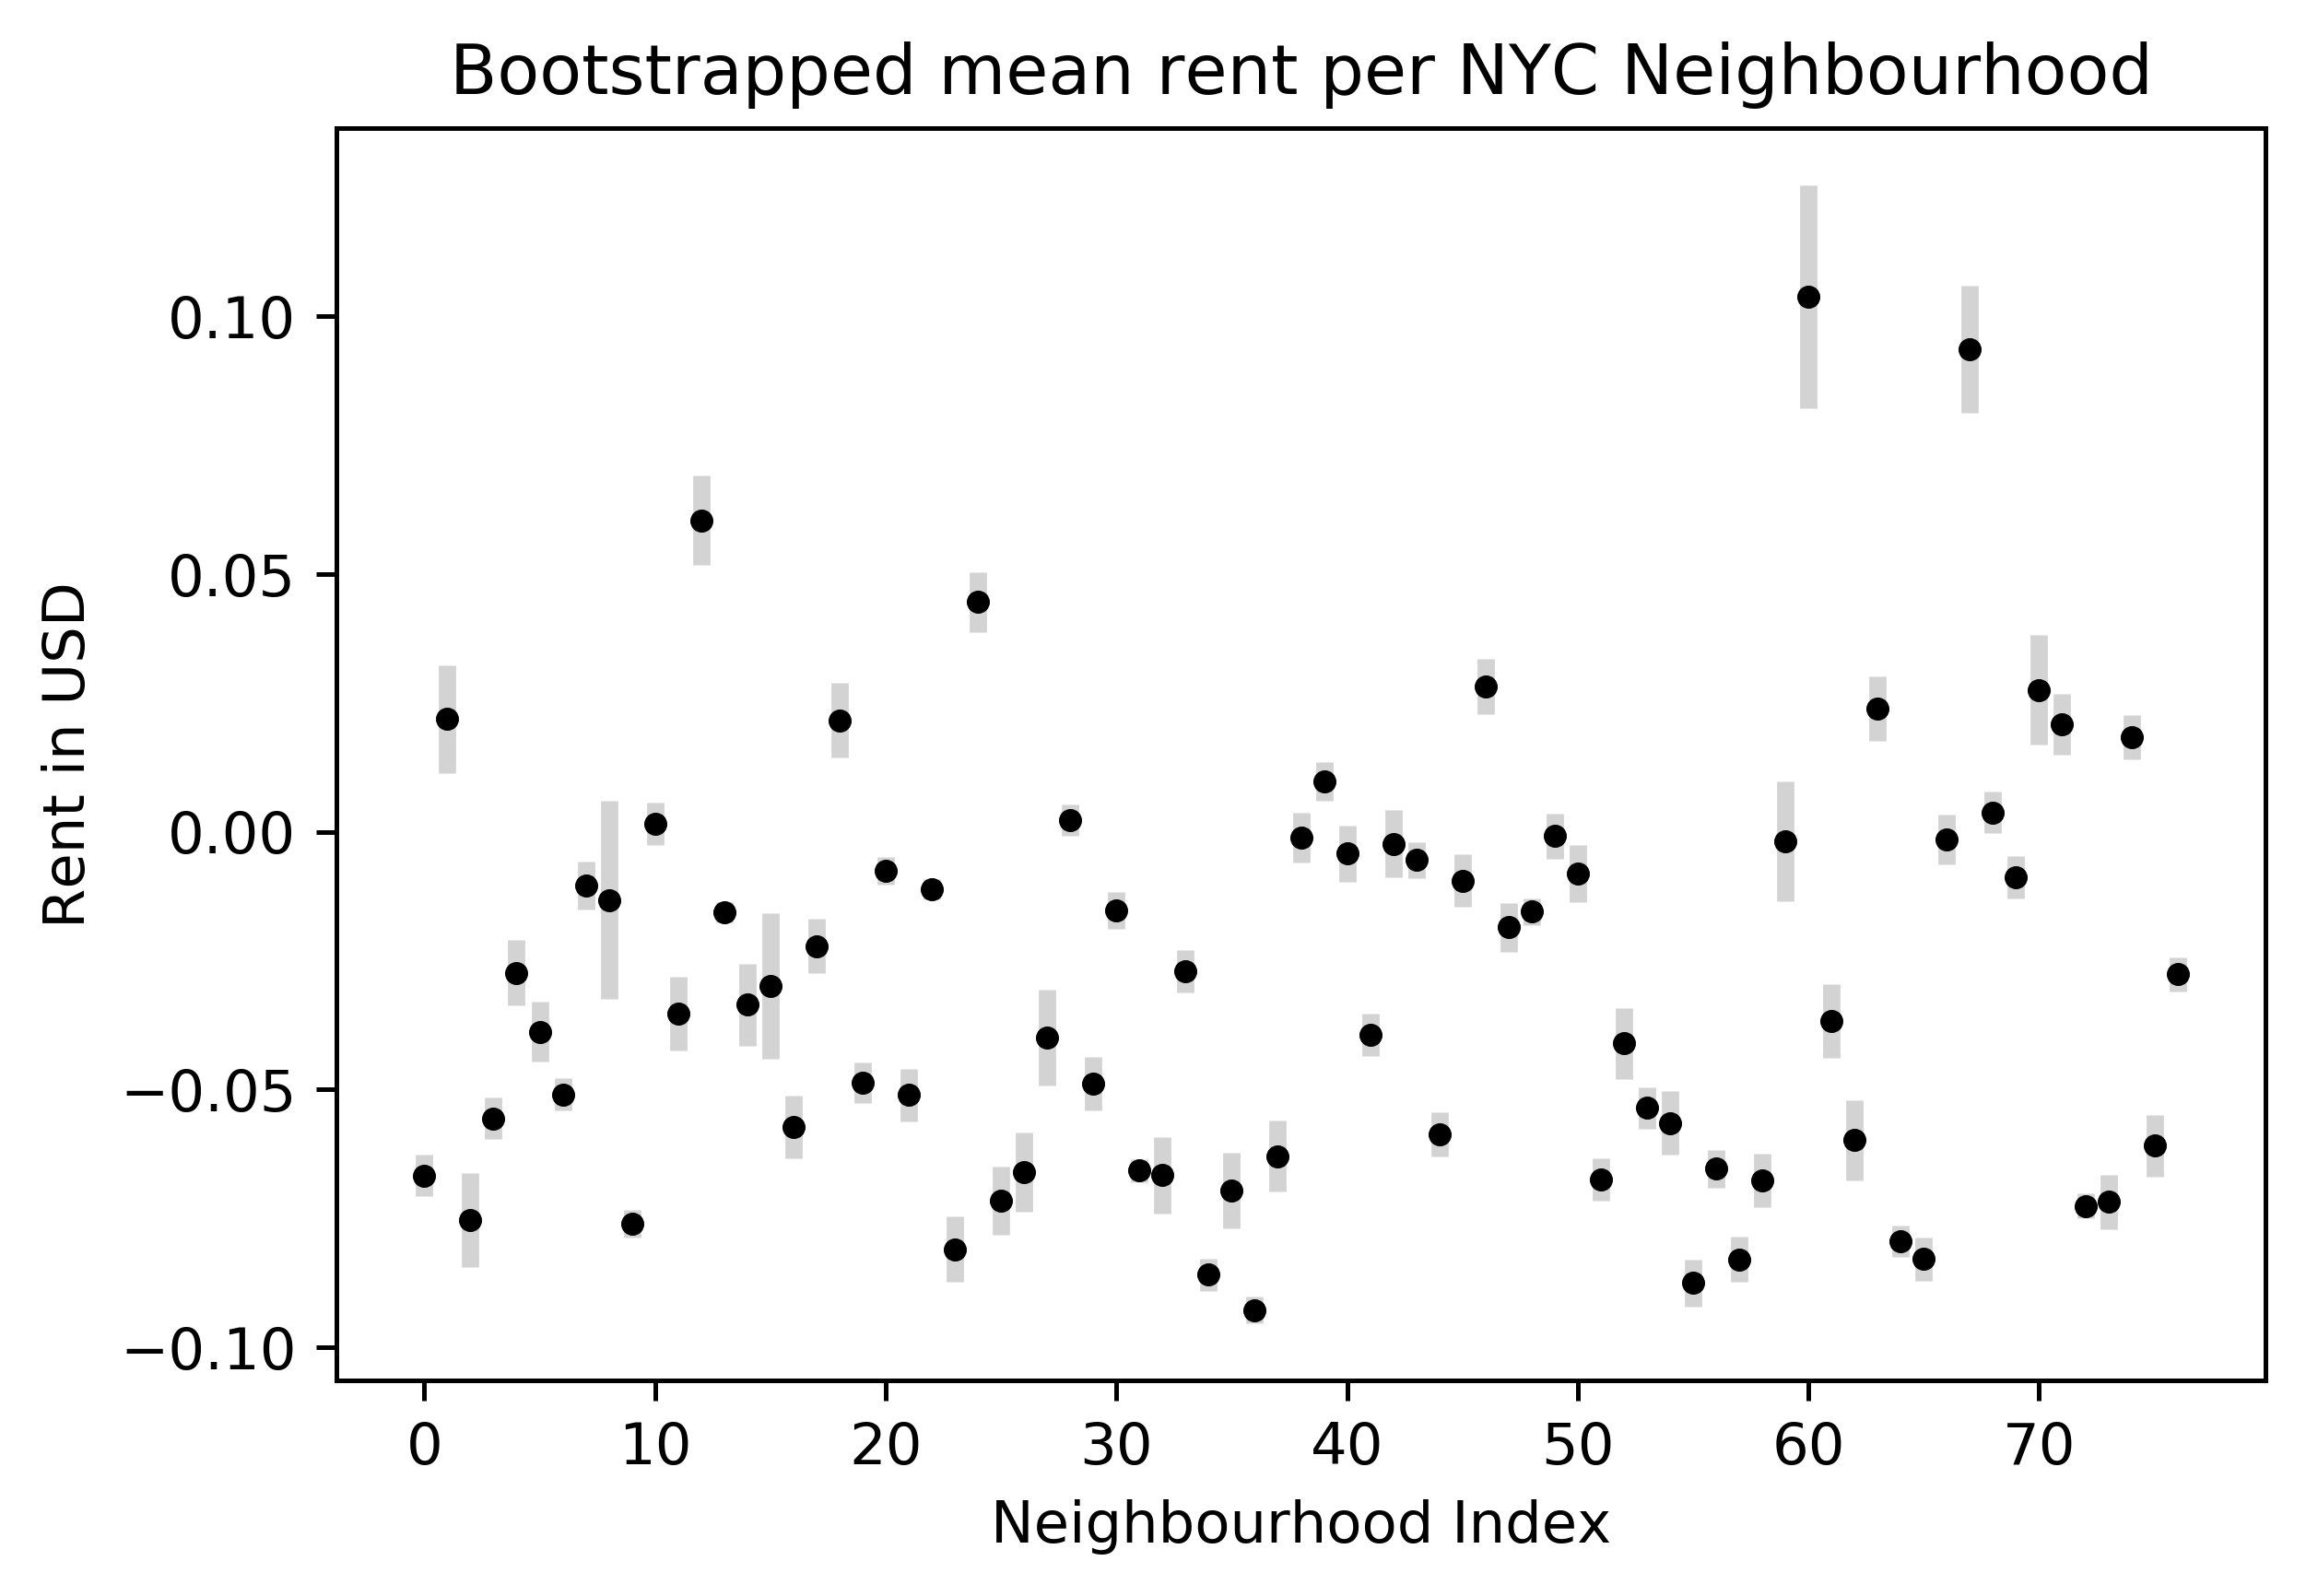

In [13]:
bootstraps = X # All districts

from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=450, facecolor='w', edgecolor='k')

mean = (bootstraps[:,0] + bootstraps[:,1]) / 2
p5 = bootstraps[:,0]
p95 = bootstraps[:,1]

plt.errorbar(
    x = range(bootstraps.shape[0]),
    y = mean,
    yerr=[mean - p5, p95 - mean],
    fmt='.k',
    color='black',
    ecolor='lightgray', 
    elinewidth=3, 
    capsize=0
)

plt.title('Bootstrapped mean rent per NYC Neighbourhood')
plt.ylabel('Rent in USD')
plt.xlabel('Neighbourhood Index')
# plt.xticks(range(bootstraps.shape[0]))
plt.show()

In [14]:
# plt.savefig('meanNoPark.png', dpi=450)
print(mean)

[-0.06674355  0.02185055 -0.07538994 -0.05561947 -0.02735353 -0.03884664
 -0.05097871 -0.01039693 -0.01324251 -0.07607453  0.00156219 -0.03528898
  0.06043417 -0.01561572 -0.03359058 -0.02995192 -0.05722213 -0.02221208
  0.02158111 -0.04874816 -0.00762636 -0.05108336 -0.01119733 -0.08098798
  0.04456019 -0.07160155 -0.0659959  -0.03988933  0.00229709 -0.04888824
 -0.01525774 -0.06572732 -0.06663828 -0.02706708 -0.08596025 -0.06962726
 -0.09277511 -0.06291735 -0.00114265  0.00973283 -0.00425105 -0.03941399
 -0.0023196  -0.00549306 -0.05870217 -0.00946233  0.02817687 -0.01852461
 -0.01550158 -0.00086704 -0.00817118 -0.06751055 -0.04109348 -0.05360752
 -0.05650665 -0.08757102 -0.06540162 -0.0829395  -0.06758363 -0.00188419
  0.10384213 -0.0367074  -0.05985316  0.02384938 -0.0794791  -0.08290636
 -0.00150408  0.09360015  0.00376924 -0.0088828   0.02754456  0.02082362
 -0.07262597 -0.07181275  0.01838412 -0.06089682 -0.02766663]


In [15]:
list(train_df)

['bathrooms',
 'bedrooms',
 'interest_level',
 'num_photos',
 'num_features',
 'num_description_words',
 'created_month',
 'created_day',
 'neighbourhood',
 'price']

In [16]:
# df.groupby('b', group_keys=False).apply(pd.DataFrame.sample, frac=.3)
train_df['interest_level'] = pd.Categorical(train_df['interest_level'], categories=train_df['interest_level'].unique()).codes
train_df['neighbourhood'] = pd.Categorical(train_df['neighbourhood'], categories=train_df['neighbourhood'].unique()).codes
train_samples = train_df.groupby('neighbourhood').apply(pd.DataFrame.sample, n=20)

In [17]:
train_samples

bathrooms  bedrooms  interest_level  num_photos  \
neighbourhood                                                          
0             158            1         3               0           7   
              1431           1         2               1          10   
              2072           1         2               1           8   
              3334           1         3               1          10   
              3373           1         1               1           6   
              703            1         0               0           5   
              1652           1         2               0          11   
              651            1         1               0          10   
              3676           1         1               1           9   
              2299           1         1               0           6   
              1620           1         2               1           4   
              471            1         2               1          13   
              499            1         1               0           7   
              769            1         2               0           6   
              2393           1         1               1           0   
              518            1         2               1           8   
              826            1         2               1           4   
              2125           1         1               0          12   
              875            1         1               1           6   
              3099           1         1               1           6   
1             2408           1         2               0           8   
              3282           1         1               0           7   
              1259           1         1               1           4   
              1700           1         2               0           5   
              1835           1         0               0           2   
              2138           1         2               1           5   
              262            1         2               1           6   
              4362           1         3               1           9   
              3370           1         1               1           4   
              3710           1         1               1           7   
...                        ...       ...             ...         ...   
75            46882          1         2               0           0   
              47565          2         3               1          11   
              48115          1         3               1          13   
              46912          1         2               2           6   
              46917          1         2               1           9   
              47331          1         1               0           9   
              47461          1         2               2           4   
              48222          1         3               0           8   
              48656          1         1               0          10   
              48696          1         1               2           6   
76            48736          1         1               1          12   
              48068          1         1               1          12   
              48692          1         0               0           4   
              48634          1         1               1          11   
              48229          1         2               0           5   
              47406          1         2               1           9   
              47696          1         1               1           0   
              48811          1         2               0           5   
              48400          1         2               0           6   
              48163          1         2               0           5   
              48337          1         1               2          13   
              48750          1         2               1           7   
              46908          1         2               1     

In [18]:
train_samples.shape

(1540, 10)

In [19]:
def sampleSet(n = 25, size = 1000):
    train_samples = train_df.groupby('neighbourhood').apply(pd.DataFrame.sample, n, replace = True)
    train_samples = train_samples.astype({'price': 'float64'})
    features = []
    labels = []
    for i, hood in enumerate(train_samples['neighbourhood'].unique()):
        samples = []
        label = []
        get_boro = train_samples[train_samples['neighbourhood'] == hood]
        get_boro = get_boro['price']
        for j in range(size):
            sample = get_boro.sample(n, replace = True).to_numpy()
            samples.append(sample)
            label.append(np.mean(sample))
        features.append(samples)
        labels.append(label)
    return np.array(features), np.array(labels)

In [20]:
def train_Set(n = 25):
    train_samples = train_df.groupby('neighbourhood').apply(pd.DataFrame.sample, n, replace = False)
    train_samples = train_samples.astype({'price': 'float64'})
    features = []
    for i, hood in enumerate(train_samples['neighbourhood'].unique()):
        get_boro = train_samples[train_samples['neighbourhood'] == hood]
        sample = get_boro.to_numpy()
        features.append(sample)
    return np.array(features)

In [21]:
X_sets = train_Set()

In [22]:
X_sets.shape

(77, 25, 10)

In [23]:
X_sets[0,0]

array([1, 2, 0, 11, 7, 122, 6, 8, 0, -0.04416928704397319], dtype=object)

In [24]:
X, y = sampleSet()

In [25]:
X_train = X
y_train = y

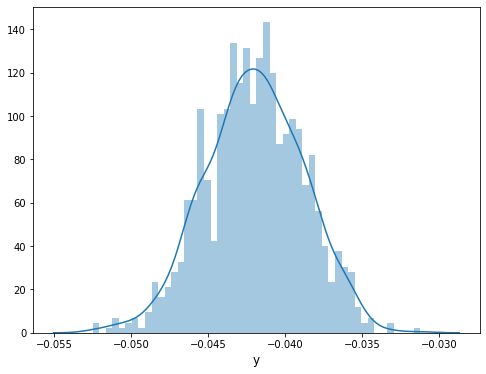

In [26]:
plt.figure(figsize=(8,6))
sns.distplot(y[0,:], bins=50, kde=True)
plt.xlabel('y', fontsize=12)
plt.show()

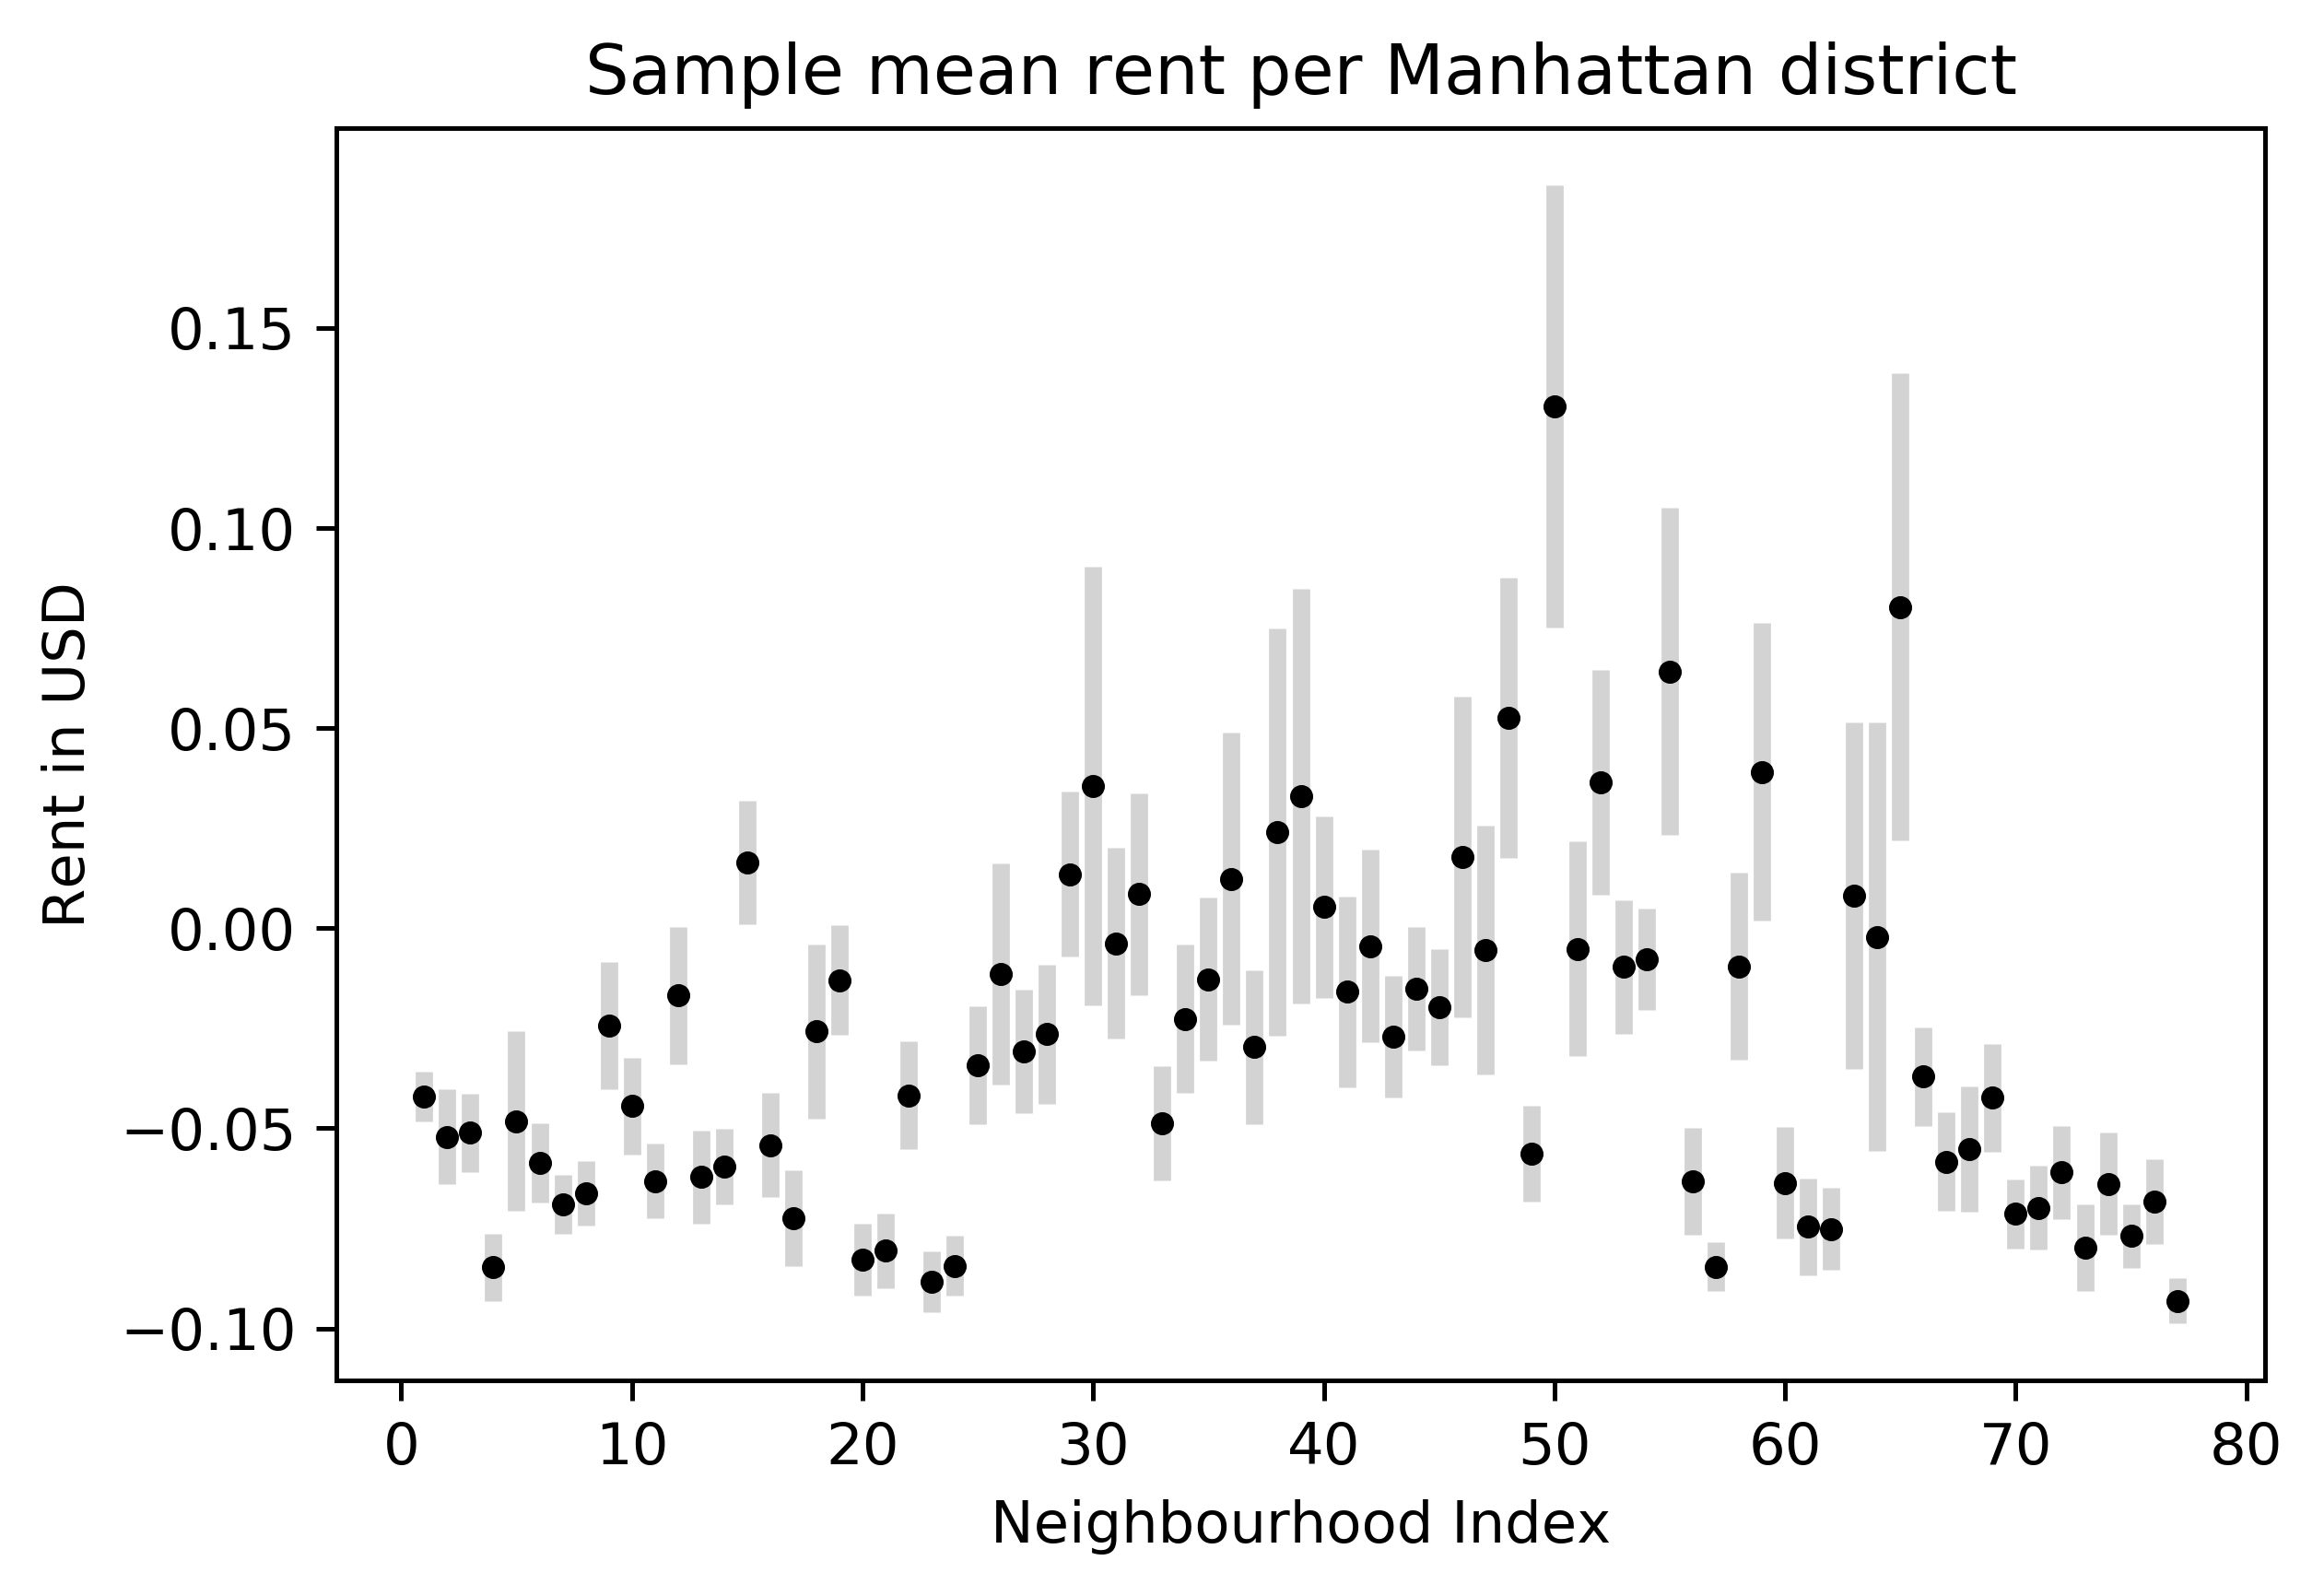

In [27]:
figure(num=None, figsize=(6, 4), dpi=450, facecolor='w', edgecolor='k')

sample_mean = np.mean(y, axis = 1)
sample_error = np.std(y, axis = 1)

plt.errorbar(
    x = range(1, bootstraps.shape[0] + 1),
    y = sample_mean,
    yerr= 1.96 * sample_error,
    fmt='.k',
    color='black',
    ecolor='lightgray', 
    elinewidth=3, 
    capsize=0
)

plt.title('Sample mean rent per Manhattan district')
plt.ylabel('Rent in USD')
plt.xlabel('Neighbourhood Index')
# plt.xticks(range(bootstraps.shape[0]))
plt.show()

In [28]:
def bootstrap(size = 10000):
    train_samples = train_df.groupby('neighbourhood').apply(pd.DataFrame.sample, frac = 1, replace = True)
    train_samples = train_samples.astype({'price':'float64'})
    features = []
    labels = []
    for i, hood in enumerate(train_samples['neighbourhood'].unique()):
        samples = []
        label = []
        get_boro = train_samples[train_samples['neighbourhood'] == hood]
        get_boro = get_boro['price']
        for j in range(size):
            sample = get_boro.sample(frac = 1, replace = True).to_numpy()
            samples.append(sample)
            label.append(np.mean(sample))
        features.append(samples)
        labels.append(label)
    return np.array(features), np.array(labels)

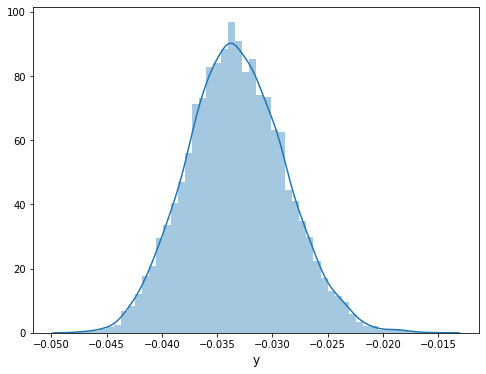

In [29]:
X, y = bootstrap()
plt.figure(figsize=(8,6))
sns.distplot(y[0,:], bins=50, kde=True)
plt.xlabel('y', fontsize=12)
plt.show()

In [30]:
np.std(y, axis = 1)

array([0.00439457, 0.00224936, 0.00319775, 0.00176194, 0.00250027,
       0.00162451, 0.00317924, 0.00352374, 0.00253066, 0.00296934,
       0.00329965, 0.00309389, 0.00208815, 0.0016598 , 0.00364666,
       0.001803  , 0.00324207, 0.00420999, 0.0027473 , 0.00253973,
       0.00338485, 0.00291202, 0.00256607, 0.00378709, 0.0031768 ,
       0.01008956, 0.00522736, 0.00216759, 0.00213567, 0.00257261,
       0.00146715, 0.00130291, 0.0016157 , 0.00100698, 0.00177902,
       0.00241946, 0.00203874, 0.00310295, 0.00556186, 0.00128859,
       0.00215364, 0.00187168, 0.00099891, 0.00249167, 0.00247485,
       0.00210502, 0.00255019, 0.00292497, 0.00110301, 0.00607973,
       0.00323338, 0.00278255, 0.00175798, 0.00341052, 0.00445913,
       0.00221518, 0.00139396, 0.00253861, 0.00217218, 0.00219277,
       0.00125496, 0.00127977, 0.00570262, 0.00523551, 0.01126011,
       0.00367473, 0.00399397, 0.00171319, 0.00207001, 0.0018924 ,
       0.00320374, 0.00395825, 0.00214731, 0.00368245, 0.00160

In [31]:
print(mean)
print(np.mean(y, axis = 1))
print(mean - np.mean(y, axis = 1))

[-0.06674355  0.02185055 -0.07538994 -0.05561947 -0.02735353 -0.03884664
 -0.05097871 -0.01039693 -0.01324251 -0.07607453  0.00156219 -0.03528898
  0.06043417 -0.01561572 -0.03359058 -0.02995192 -0.05722213 -0.02221208
  0.02158111 -0.04874816 -0.00762636 -0.05108336 -0.01119733 -0.08098798
  0.04456019 -0.07160155 -0.0659959  -0.03988933  0.00229709 -0.04888824
 -0.01525774 -0.06572732 -0.06663828 -0.02706708 -0.08596025 -0.06962726
 -0.09277511 -0.06291735 -0.00114265  0.00973283 -0.00425105 -0.03941399
 -0.0023196  -0.00549306 -0.05870217 -0.00946233  0.02817687 -0.01852461
 -0.01550158 -0.00086704 -0.00817118 -0.06751055 -0.04109348 -0.05360752
 -0.05650665 -0.08757102 -0.06540162 -0.0829395  -0.06758363 -0.00188419
  0.10384213 -0.0367074  -0.05985316  0.02384938 -0.0794791  -0.08290636
 -0.00150408  0.09360015  0.00376924 -0.0088828   0.02754456  0.02082362
 -0.07262597 -0.07181275  0.01838412 -0.06089682 -0.02766663]
[-3.32780683e-02 -5.34930034e-02 -3.69669647e-02 -8.39012950e-

In [32]:
low = np.mean(y, axis = 1) - 1.96 * np.std(y, axis = 1)
high = np.mean(y, axis = 1) + 1.96 * np.std(y, axis = 1)

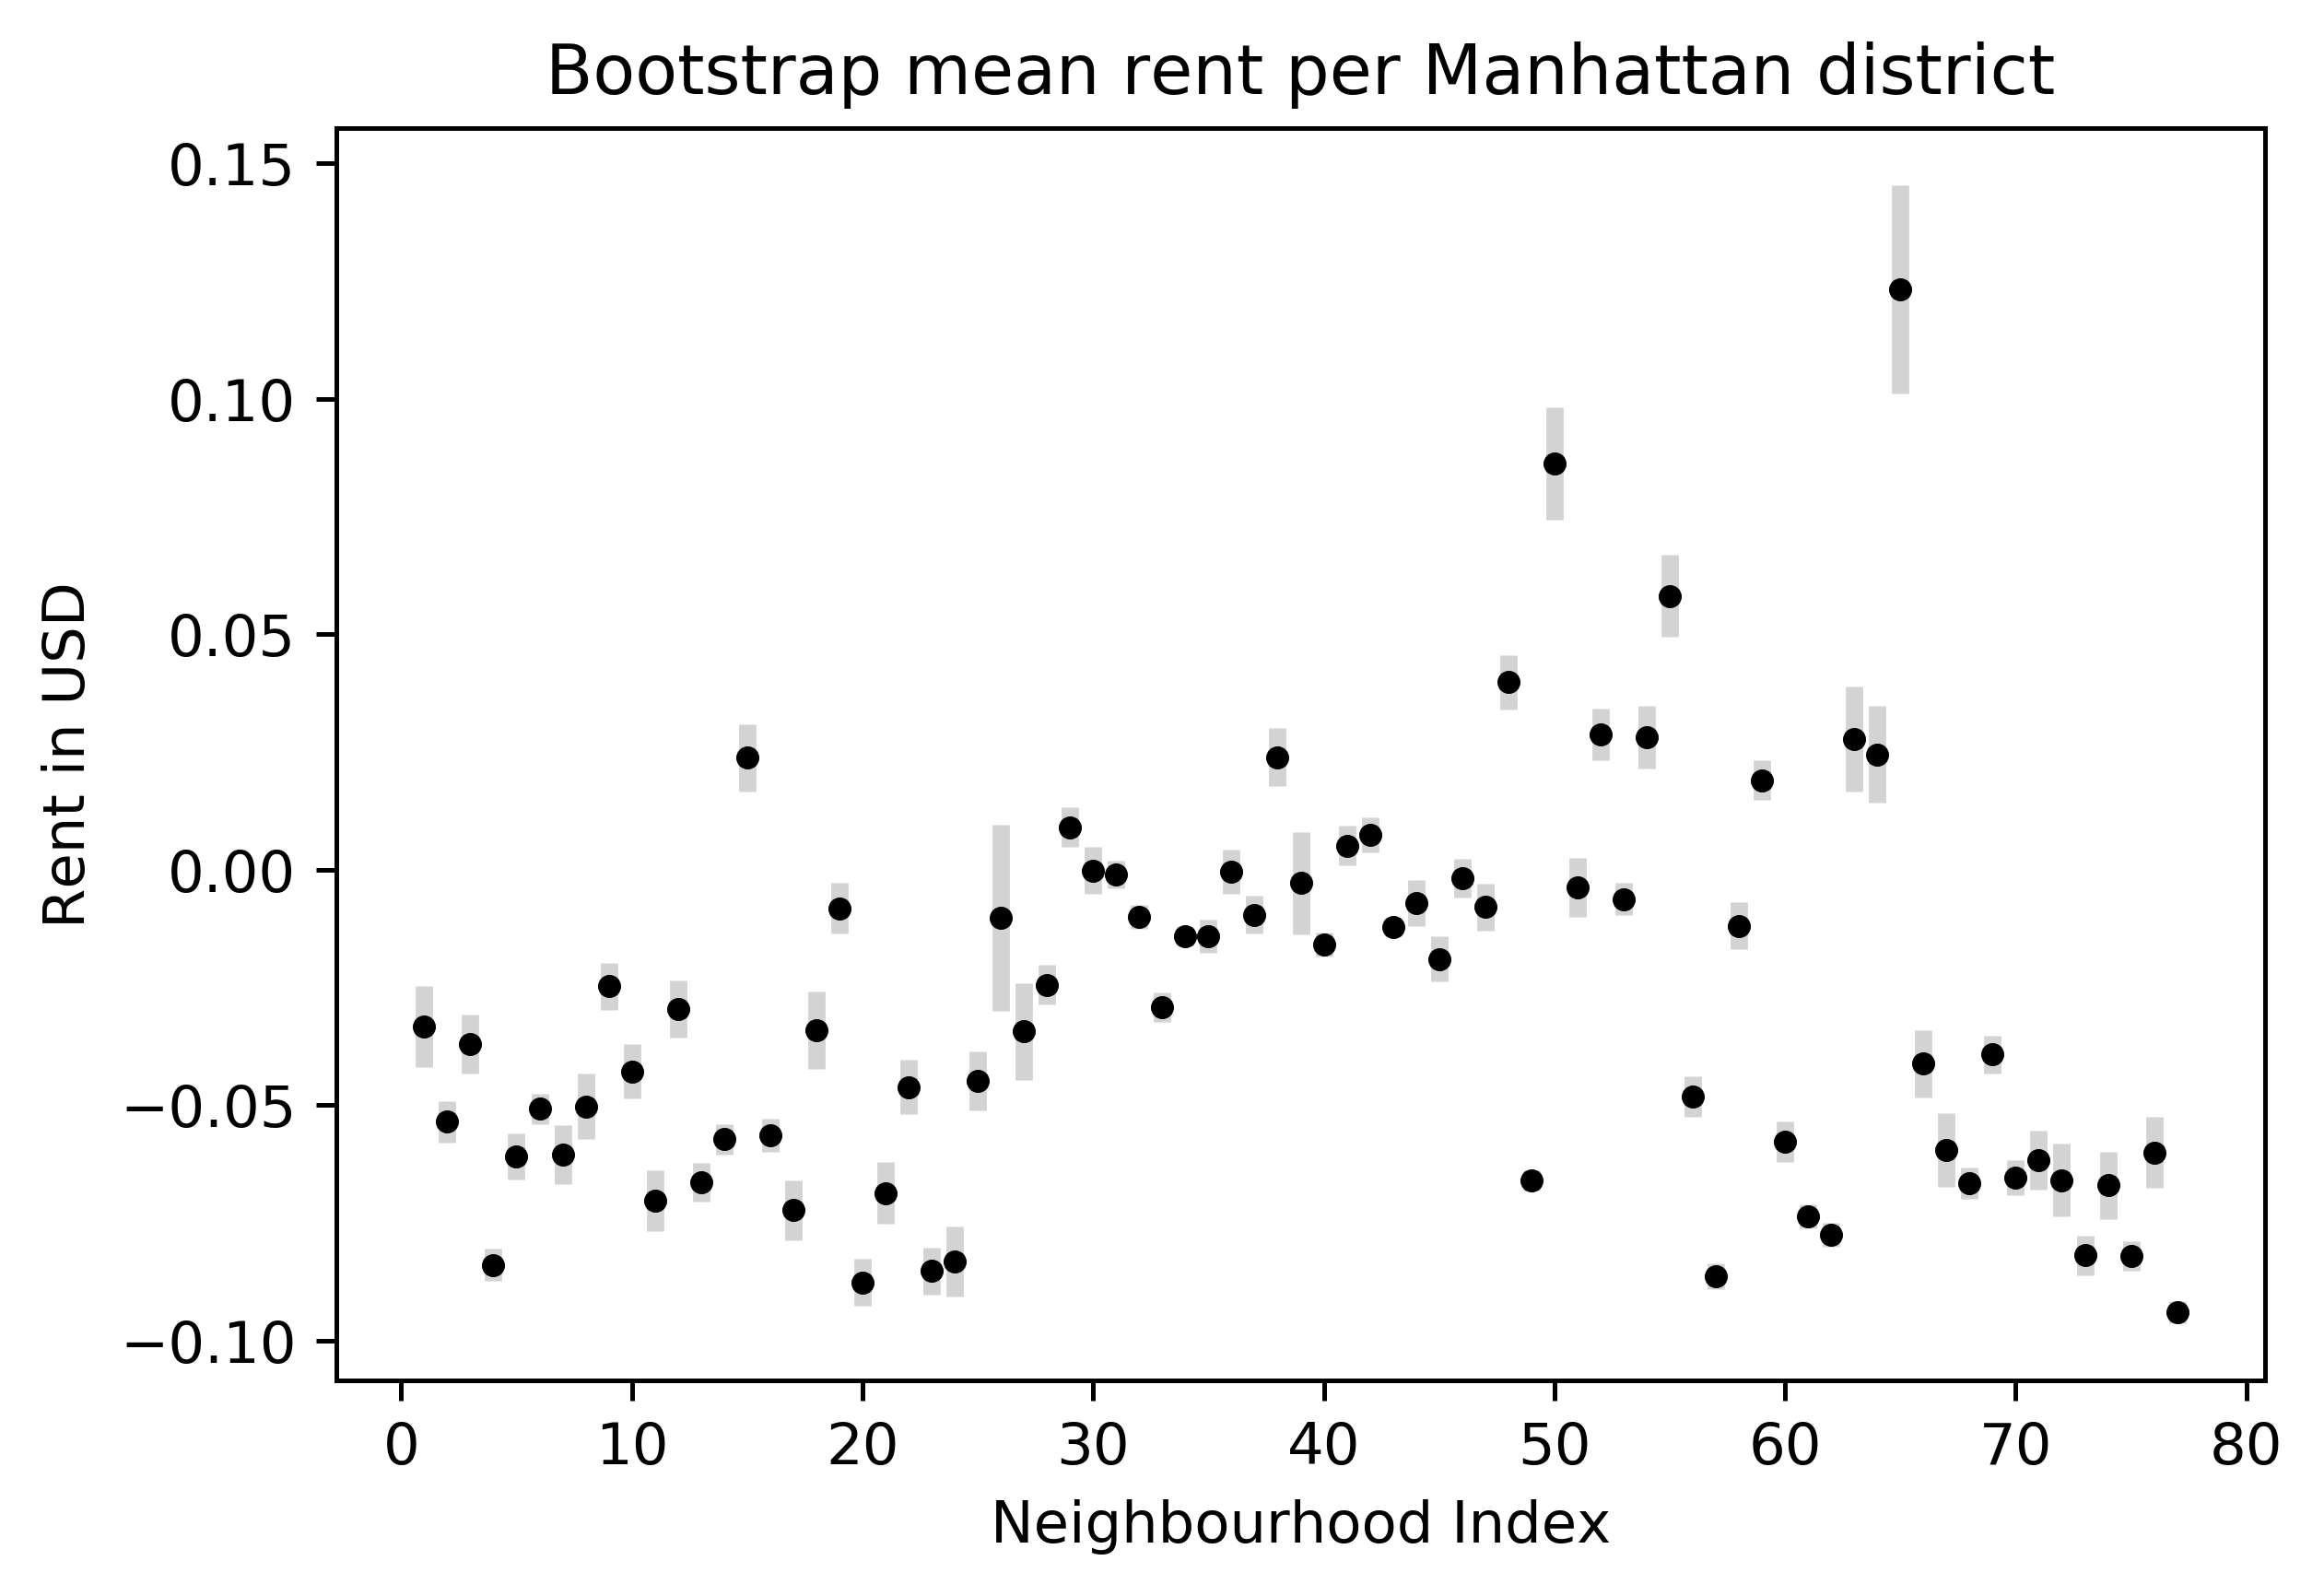

In [33]:
figure(num=None, figsize=(6, 4), dpi=450, facecolor='w', edgecolor='k')

sample_mean = np.mean(y, axis = 1)
sample_error = np.std(y, axis = 1)

plt.errorbar(
    x = range(1, bootstraps.shape[0] + 1),
    y = sample_mean,
    yerr= 1.96 * sample_error,
    fmt='.k',
    color='black',
    ecolor='lightgray', 
    elinewidth=3, 
    capsize=0
)

plt.title('Bootstrap mean rent per Manhattan district')
plt.ylabel('Rent in USD')
plt.xlabel('Neighbourhood Index')
# plt.xticks(range(1, bootstraps.shape[0] + 1))
plt.show()

In [34]:
X_sets.shape

(77, 25, 10)

### GCN 

In [35]:
import torch
print('Torch version:', torch.__version__)
import torch.nn as nn
import torch.nn.functional as F
import scipy.sparse as sp

# import dgl
# from dgl.nn.pytorch import GraphConv
# import networkx as nx

Torch version: 1.5.1


In [36]:
# features = np.mean(y, axis = 1)
features = np.reshape(X_sets,(X_sets.shape[0], -1))
features = np.array(features, dtype='float')
# labels = mean
labels = np.array(mean, dtype = 'float')

# idx_train = list(np.array([1, 6, 7, 12]) - 1)
# idx_val = list(np.array([3, 5, 8, 10])  - 1)
# idx_test = list(np.array([2, 4, 9, 11])  - 1)

# produce a split for training, validation and testing
indices = np.arange(0, mean.shape[0]) # number of rows
np.random.shuffle(indices)
idx_train = indices[:59]
idx_val = indices[60:69]
idx_test = indices[70:]


# train_labels = [mean[i] for i in index_train]
# val_labels = [mean[i] for i in index_val]
# test_labels = [mean[i] for i in index_test]

adj = np.loadtxt('adj_nbhd.txt', dtype='float', delimiter=',')

# test = adj
# D = np.diag(np.power(np.sum(adj, axis = 1), -1))
# adj = np.dot(adj, D)

# adj = csr_matrix(adj)

# G = dgl.DGLGraph()
# adj_nx = nx.from_numpy_matrix(adj)
# G = dgl.from_networkx(adj_nx)

# print(features.shape)
# # print(features.T)

def normalize(mx):
    """Row-normalize sparse matrix"""
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx

adj = normalize(adj)
print(adj.shape)

(77, 77)


In [37]:
import math
import torch
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module
import time


class GraphConvolution(Module):
    """
    Simple GCN layer, similar to https://arxiv.org/abs/1609.02907
    """

    def __init__(self, in_features, out_features, bias=True):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))
        if bias:
            self.bias = Parameter(torch.FloatTensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, input, adj):
        support = torch.mm(input, self.weight)
        output = torch.spmm(adj, support)
        if self.bias is not None:
            return output + self.bias
        else:
            return output

    def __repr__(self):
        return self.__class__.__name__ + ' (' \
               + str(self.in_features) + ' -> ' \
               + str(self.out_features) + ')'


class GCN(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
#     def __init__(self, nfeat, nclass, dropout):
        super(GCN, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nclass)
#         self.gc1 = GraphConvolution(nfeat, nclass)

        self.dropout = dropout

    def forward(self, x, adj):
        x = F.relu(self.gc1(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc2(x, adj)
        return x
    
# def accuracy(output, labels):
#     preds = output.max(1)[1].type_as(labels)
#     correct = preds.eq(labels).double()
#     correct = correct.sum()
#     return correct / len(labels)

In [38]:
EPOCHS = 5000

# Model and optimizer
model = GCN(nfeat=features.shape[1],nhid=16,nclass=1,dropout=0.4)
# model = GCN(nfeat=features.shape[1],nclass=1,dropout=0.2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.01)
mse = nn.MSELoss()

features = torch.FloatTensor(features)
labels = torch.FloatTensor(mean)
adj = torch.FloatTensor(adj)
idx_train = torch.LongTensor(idx_train)
idx_val = torch.LongTensor(idx_val)
idx_test = torch.LongTensor(idx_test)


def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output = model(features, adj)
    loss_train = mse(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    loss_val = mse(output[idx_val], labels[idx_val])
    if((epoch + 1) % 1000 == 0):
        print('Epoch: {:04d}'.format(epoch+1),
              'loss_train: {:.4f}'.format(loss_train.item()),
              'loss_val: {:.4f}'.format(loss_val.item()),
              'time: {:.4f}s'.format(time.time() - t))


def test():
    model.eval()
    output = model(features, adj)
    loss_test = mse(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()))


# Train model
t_total = time.time()
for epoch in range(EPOCHS):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
test()

D:\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([59])) that is different to the input size (torch.Size([59, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1000 loss_train: 0.1037 loss_val: 0.2389 time: 0.0000s
Epoch: 2000 loss_train: 0.0157 loss_val: 0.0681 time: 0.0010s
Epoch: 3000 loss_train: 0.0043 loss_val: 0.0506 time: 0.0010s
Epoch: 4000 loss_train: 0.0019 loss_val: 0.0022 time: 0.0010s
Epoch: 5000 loss_train: 0.0017 loss_val: 0.0017 time: 0.0010s
Optimization Finished!
Total time elapsed: 4.0442s


D:\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Test set results: loss= 0.0024


In [39]:
output = model(features, adj)

In [40]:
print(torch.mean(torch.abs(output.T-labels)))
mse(output[idx_test], labels[idx_test]) # print standardized MSE of model

tensor(0.0375, grad_fn=<MeanBackward0>)


tensor(0.0024, grad_fn=<MseLossBackward>)

In [41]:
np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy())

0.04884467

In [42]:
clone = pd.read_csv('neighbourhood_data.csv')['price']

In [43]:
print('RMSE of model in USD:', clone.std() * np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy()))

RMSE of model in USD: 1079.3058600412746


### Pure Deep Sets

In [44]:
class DeepSet(nn.Module):

    def __init__(self, in_features=10, set_features=25):
        super(DeepSet, self).__init__()
        self.in_features = in_features
        self.out_features = set_features
        self.feature_extractor = nn.Sequential(
            nn.Linear(in_features, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, set_features)
        )

        self.regressor = nn.Sequential(
            nn.Linear(set_features, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, 5),
            nn.ELU(inplace=True),
            nn.Linear(5, 1),
        )
        
        self.add_module('0', self.feature_extractor)
        self.add_module('1', self.regressor)
        
        
    def reset_parameters(self):
        for module in self.children():
            reset_op = getattr(module, "reset_parameters", None)
            if callable(reset_op):
                reset_op()
            
    def forward(self, input):
        x = input
        x = self.feature_extractor(x)
        x = x.sum(dim=1)
        x = self.regressor(x)
        return x

    def __repr__(self):
        return self.__class__.__name__ + '(' \
            + 'Feature Exctractor=' + str(self.feature_extractor) \
            + '\n Set Feature' + str(self.regressor) + ')'

In [45]:
# from tensorboardX import SummaryWriter
from torch import optim
from tqdm import tqdm


EPOCHS = 100

model = DeepSet()
if torch.cuda.is_available():
    model.cuda()

optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-3)


mse = nn.MSELoss()
# mse = nn.L1Loss()

features = np.array(X_sets, dtype='float')
features = torch.FloatTensor(features)
labels = torch.FloatTensor(mean)
adj = torch.FloatTensor(adj)
idx_train = torch.LongTensor(idx_train)
idx_val = torch.LongTensor(idx_val)
idx_test = torch.LongTensor(idx_test)


def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output = model(features)
    loss_train = mse(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    loss_val = mse(output[idx_val], labels[idx_val])
    if((epoch + 1) % 10 == 0):
        print('Epoch: {:04d}'.format(epoch+1),
              'loss_train: {:.4f}'.format(loss_train.item()),
              'loss_val: {:.4f}'.format(loss_val.item()),
              'time: {:.4f}s'.format(time.time() - t))


def test():
    model.eval()
    output = model(features)
    loss_test = mse(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()))


# Train model
t_total = time.time()
for epoch in range(EPOCHS):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
test()

Epoch: 0010 loss_train: 1.5371 loss_val: 1.3319 time: 0.0040s
Epoch: 0020 loss_train: 0.2228 loss_val: 0.1431 time: 0.0030s
Epoch: 0030 loss_train: 0.0460 loss_val: 0.0304 time: 0.0040s
Epoch: 0040 loss_train: 0.0407 loss_val: 0.0302 time: 0.0030s
Epoch: 0050 loss_train: 0.0322 loss_val: 0.0568 time: 0.0040s
Epoch: 0060 loss_train: 0.0200 loss_val: 0.0275 time: 0.0040s
Epoch: 0070 loss_train: 0.0117 loss_val: 0.0168 time: 0.0040s
Epoch: 0080 loss_train: 0.0080 loss_val: 0.0127 time: 0.0040s
Epoch: 0090 loss_train: 0.0065 loss_val: 0.0082 time: 0.0040s
Epoch: 0100 loss_train: 0.0058 loss_val: 0.0062 time: 0.0030s
Optimization Finished!
Total time elapsed: 0.4638s
Test set results: loss= 0.0046


In [46]:
output = model(features)
print('RMSE of model in USD:', clone.std() * np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy()))

RMSE of model in USD: 1505.122859729348


### SetGCN (end to end trainable)

In [47]:
features.size()

torch.Size([77, 25, 10])

In [48]:
import math
import torch
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module
import time

class GraphDeepSet(nn.Module):

    def __init__(self, in_features=10, set_features=25, nhid = 64, dropout = 0.3):
        super(GraphDeepSet, self).__init__()
        self.in_features = in_features
        self.out_features = set_features
        self.gc1 = GraphConvolution(nhid, nhid)
        self.gc2 = GraphConvolution(nhid, 1)
        self.dropout = dropout
        self.feature_extractor = nn.Sequential(
            nn.Linear(in_features, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, set_features)
        )

        self.regressor = nn.Sequential(
            nn.Linear(set_features, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, nhid),
            nn.ELU(inplace=True),
            nn.Linear(nhid, nhid),
        )
        
        self.add_module('0', self.feature_extractor)
        self.add_module('1', self.regressor)
        
        
    def reset_parameters(self):
        for module in self.children():
            reset_op = getattr(module, "reset_parameters", None)
            if callable(reset_op):
                reset_op()
            
    def forward(self, input, adj):
        x = input
        x = self.feature_extractor(x)
        x = x.sum(dim=1)
        x = self.regressor(x)
        x = self.gc1(x, adj)
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc2(x, adj)
        return x

    def __repr__(self):
        return self.__class__.__name__ + '(' \
            + 'Feature Exctractor=' + str(self.feature_extractor) \
            + '\n Set Feature' + str(self.regressor) + ')'

In [49]:
EPOCHS = 1000

features = np.array(X_sets, dtype='float')
features = torch.FloatTensor(features)
labels = torch.FloatTensor(mean)
adj = torch.FloatTensor(adj)
idx_train = torch.LongTensor(idx_train)
idx_val = torch.LongTensor(idx_val)
idx_test = torch.LongTensor(idx_test)

# Model and optimizer
model = GraphDeepSet()
# model = GCN(nfeat=features.shape[1],nclass=1,dropout=0.2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.0001)
mse = nn.MSELoss()


def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output = model(features, adj)
    loss_train = mse(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    loss_val = mse(output[idx_val], labels[idx_val])
    if((epoch + 1) % 250 == 0):
        print('Epoch: {:04d}'.format(epoch+1),
              'loss_train: {:.4f}'.format(loss_train.item()),
              'loss_val: {:.4f}'.format(loss_val.item()),
              'time: {:.4f}s'.format(time.time() - t))


def test():
    model.eval()
    output = model(features, adj)
    loss_test = mse(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()))


# Train model
t_total = time.time()
for epoch in range(EPOCHS):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
test()

Epoch: 0250 loss_train: 0.0815 loss_val: 0.1605 time: 0.0050s
Epoch: 0500 loss_train: 0.0388 loss_val: 0.0523 time: 0.0040s
Epoch: 0750 loss_train: 0.0100 loss_val: 0.0107 time: 0.0040s
Epoch: 1000 loss_train: 0.0129 loss_val: 0.0087 time: 0.0040s
Optimization Finished!
Total time elapsed: 4.2407s
Test set results: loss= 0.0031


In [50]:
output = model(features, adj)

In [51]:
print('RMSE of model in USD:', clone.std() * np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy()))

RMSE of model in USD: 1228.445286028751


### MLP

In [52]:
features = np.reshape(X_sets,(X_sets.shape[0], -1))
features = np.array(features, dtype='float')
features = torch.FloatTensor(features)
labels = torch.FloatTensor(mean)
adj = torch.FloatTensor(adj)
idx_train = torch.LongTensor(idx_train)
idx_val = torch.LongTensor(idx_val)
idx_test = torch.LongTensor(idx_test)

class MLP(Module):

    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(features.shape[1], 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        output = x
        return output



EPOCHS = 1500

# Model and optimizer
model2 = MLP()
# model = GCN(nfeat=features.shape[1],nclass=1,dropout=0.2)
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-3, weight_decay=0.001)
mse = nn.MSELoss()
# mse = nn.L1Loss()




def train(epoch):
    t = time.time()
    model2.train()
    optimizer.zero_grad()
    output = model2(features)
    loss_train = mse(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    loss_val = mse(output[idx_val], labels[idx_val])
    if((epoch + 1) % 500 == 0):
        print('Epoch: {:04d}'.format(epoch+1),
              'loss_train: {:.4f}'.format(loss_train.item()),
              'loss_val: {:.4f}'.format(loss_val.item()),
              'time: {:.4f}s'.format(time.time() - t))


def test():
    model2.eval()
    output = model2(features)
    loss_test = mse(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()))


# Train model
t_total = time.time()
for epoch in range(EPOCHS):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
test()

Epoch: 0500 loss_train: 0.0017 loss_val: 0.0382 time: 0.0060s
Epoch: 1000 loss_train: 0.0018 loss_val: 0.0368 time: 0.0050s
Epoch: 1500 loss_train: 0.0017 loss_val: 0.0363 time: 0.0080s
Optimization Finished!
Total time elapsed: 9.0319s
Test set results: loss= 0.0479


In [53]:
output = model2(features)

In [54]:
print('RMSE of model in USD:', clone.std() * np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy()))

RMSE of model in USD: 4835.579045999827


### Produce RMSE plots in USD for method versus baseline

In [55]:
# num_test_per_sample = 10
# samples_num_list = [2,5,10,15,20,25,30,40,50]

num_test_per_sample = 8
samples_num_list = [25]

EPOCHS_DS = 50
EPOCHS_GCN = 5000
EPOCHS_MLP = 1000
EPOCHS_SGCN = 1000


max_iter_list = [EPOCHS_MLP, EPOCHS_GCN, EPOCHS_DS, EPOCHS_SGCN]
models = [MLP(),
          GCN(nfeat=features.shape[1],nhid=16,nclass=1,dropout=0.4),
          DeepSet(),
          GraphDeepSet()]

def trials():
    indices = np.arange(0, mean.shape[0]) # number of rows
    np.random.shuffle(indices)
    idx_train = indices[:55]
#     idx_val = indices[60:69]
    idx_test = indices[56:]
    results = []
    adj = np.loadtxt('adj_nbhd.txt', dtype='float', delimiter=',')
    adj = normalize(adj)
    
    
    def train(epoch, model):
        t = time.time()
        model.train()
        optimizer.zero_grad()
        if isinstance(model, MLP) or isinstance(model, DeepSet):
            output = model(features)
        else:
            output = model(features, adj)
        loss_train = mse(output[idx_train], labels[idx_train])
        loss_train.backward()
        optimizer.step()
#         loss_val = mse(output[idx_val], labels[idx_val])

    for network, max_iter in zip(models, max_iter_list):
        for sample in samples_num_list:
            for i in range(num_test_per_sample):
                X = train_Set(n = sample)
                X_train = X
                y_train = y

                # Model and optimizer
                model = network
                # model = GCN(nfeat=features.shape[1],nclass=1,dropout=0.2)
                optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.01)
                mse = nn.MSELoss()
                
                features = np.array(X_train, dtype='float')

                if isinstance(model, MLP) or isinstance(model, GCN):
                    features = np.reshape(features,(features.shape[0], -1))
                else:
                    features = np.array(X_train, dtype='float')
                features = torch.FloatTensor(features)
                labels = torch.FloatTensor(mean)
                adj = torch.FloatTensor(adj)
                idx_train = torch.LongTensor(idx_train)
#                 idx_val = torch.LongTensor(idx_val)
                idx_test = torch.LongTensor(idx_test)

                # Train model
                t_total = time.time()
                for epoch in range(max_iter):
                    train(epoch, model)

                if isinstance(model, MLP) or isinstance(model, DeepSet):
                    output = model(features)
                else:
                    output = model(features, adj)

                results.append(non_standardized['price'].std() * np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy()))

    return results

results = trials()

D:\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([55])) that is different to the input size (torch.Size([55, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([21])) that is different to the input size (torch.Size([21, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [56]:
model_errors = np.array(results).reshape(len(models),num_test_per_sample)
model_means = np.mean(model_errors, axis = 1)
model_std = np.std(model_errors, axis = 1)

In [57]:
print(model_means)
print(model_std)

[1662.85226462 1372.26895716 1363.93416788 1272.41992349]
[955.47456191 319.55472718 135.06047653  55.91375182]


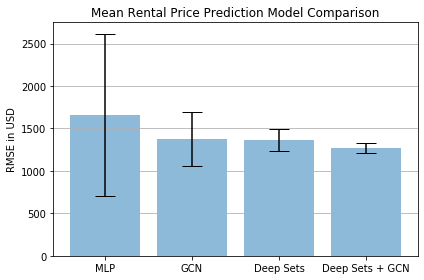

In [58]:
# Define labels, positions, bar heights and error bar heights
labels = ['MLP', 'GCN', 'Deep Sets', 'Deep Sets + GCN']
x_pos = np.arange(len(labels))
mean = model_means
error = model_std

fig, ax = plt.subplots()
ax.bar(x_pos, mean,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('RMSE in USD')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Mean Rental Price Prediction Model Comparison')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()

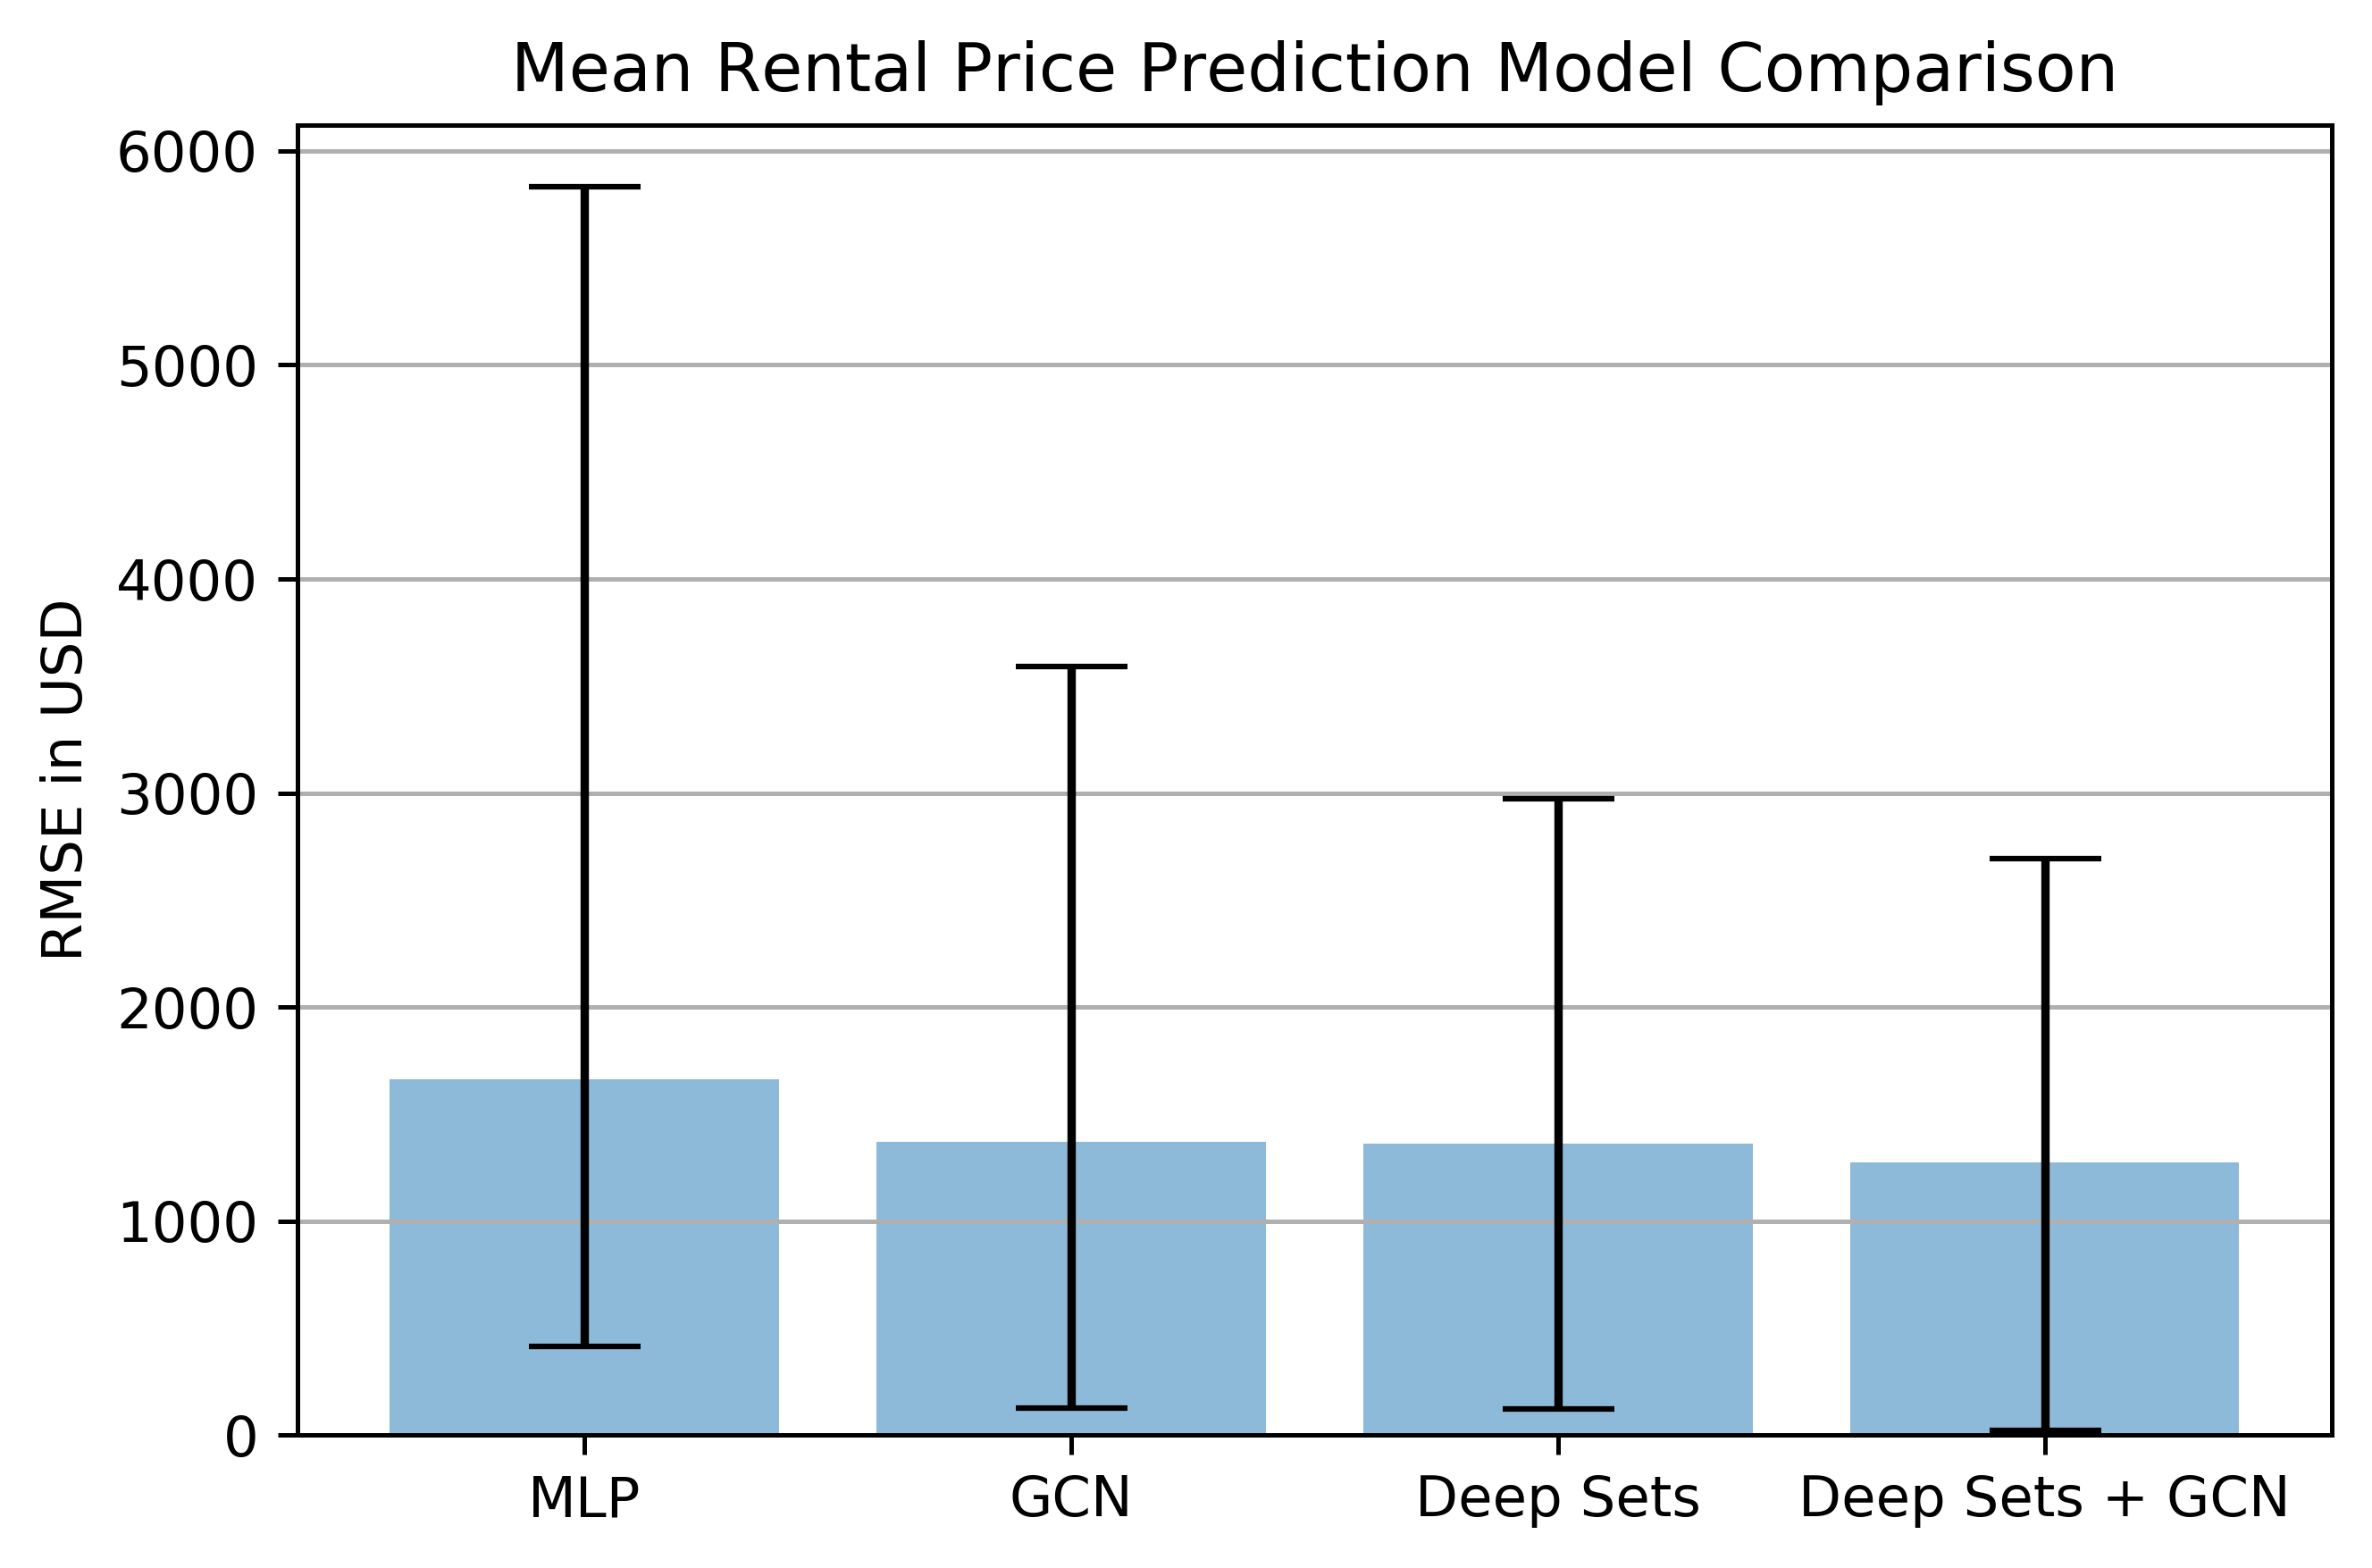

In [66]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 450
# fig, ax = plt.subplots(figsize=(12, 8))
fig, ax = plt.subplots()
# Define labels, positions, bar heights and error bar heights
labels = ['MLP', 'GCN', 'Deep Sets', 'Deep Sets + GCN']
x_pos = np.arange(len(labels))
mean = model_means
lower_error = np.min(model_errors, axis = 1)
upper_error = np.max(model_errors, axis = 1)
asymmetric_error = [lower_error, upper_error]


ax.bar(x_pos, mean,
       yerr=asymmetric_error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('RMSE in USD')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Mean Rental Price Prediction Model Comparison')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
# plt.savefig('bar_plot_with_error_bars_asym.png')
plt.show()

In [60]:
# num_test_per_sample = 10
# samples_num_list = [2,5,10,15,20,25,30,40]


# def trials():
#     indices = np.arange(0, mean.shape[0]) # number of rows
#     np.random.shuffle(indices)
#     idx_train = indices[:59]
#     idx_val = indices[60:69]
#     idx_test = indices[70:]
#     results_model = []
#     results_baseline = []
#     adj = np.loadtxt('adj_nbhd.txt', dtype='float', delimiter=',')
#     adj = normalize(adj)
    
    
#     def train(epoch):
#         t = time.time()
#         model.train()
#         optimizer.zero_grad()
#         output = model(features, adj)
#         loss_train = mse(output[idx_train], labels[idx_train])
#         loss_train.backward()
#         optimizer.step()

#         loss_val = mse(output[idx_val], labels[idx_val])
# #         if((epoch + 1) % 1000 == 0):
# #             print('Epoch: {:04d}'.format(epoch+1),
# #                   'loss_train: {:.4f}'.format(loss_train.item()),
# #                   'loss_val: {:.4f}'.format(loss_val.item()),
# #                   'time: {:.4f}s'.format(time.time() - t))

#     def test():
#         model.eval()
#         output = model(features, adj)
#         loss_test = mse(output[idx_test], labels[idx_test])
# #         print("Test set results:",
# #               "loss= {:.4f}".format(loss_test.item()))
    
#     for sample in samples_num_list:
#         for i in range(num_test_per_sample):
#             X, y = trainSet(sample, 200)
#             X_train = X
#             y_train = y

#             features = np.mean(y, axis = 1)
#             features = np.reshape(features,(features.shape[0], -1))
#             features = np.array(features, dtype='float')
#             labels = np.array(mean, dtype = 'float')

#             EPOCHS = 5000

#             # Model and optimizer
#             model = GCN(nfeat=features.shape[1],nhid=16,nclass=1,dropout=0.4)
#             # model = GCN(nfeat=features.shape[1],nclass=1,dropout=0.2)
#             optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.01)
#             mse = nn.MSELoss()

#             features = torch.FloatTensor(features)
#             labels = torch.FloatTensor(mean)
#             adj = torch.FloatTensor(adj)
#             idx_train = torch.LongTensor(idx_train)
#             idx_val = torch.LongTensor(idx_val)
#             idx_test = torch.LongTensor(idx_test)

#             # Train model
#             t_total = time.time()
#             for epoch in range(EPOCHS):
#                 train(epoch)
                
#             output = model(features, adj)

#             results_model.append(non_standardized['price'].std() * np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy()))
#             results_baseline.append(non_standardized['price'].std() * np.sqrt(mse(features[idx_test], labels[idx_test]).detach().numpy()))

#     return results_model, results_baseline

# model, baseline = trials()

In [61]:
# model_errors = np.array(model).reshape(len(samples_num_list),num_test_per_sample)
# baseline_errors = np.array(baseline).reshape(len(samples_num_list),num_test_per_sample)

# model_means = np.mean(model_errors, axis = 1)
# baseline_means = np.mean(baseline_errors, axis = 1)
# model_std = np.std(model_errors, axis = 1)
# baseline_std = np.std(baseline_errors, axis = 1)

In [62]:
# plt.figure(figsize=(8,6))
# plt.errorbar(samples_num_list, model_means, yerr=model_std, fmt='o', color='darkblue', ecolor='lightblue', elinewidth=3)
# plt.errorbar(samples_num_list, baseline_means, yerr=baseline_std, fmt='o', color='darkred', ecolor='salmon', elinewidth=3)
# plt.xticks(samples_num_list)
# plt.xlabel("Number of samples at each neighbourhood", fontsize=16)
# plt.ylabel("Root mean squared error in US$", fontsize=16)
# plt.legend(["Proposed Model", "Local Averaging"], fontsize=16)
# plt.title("RMSE of Rental Price Prediction", fontsize=18, fontweight='bold')
# # plt.savefig('experiment_1.png', dpi=450, facecolor='w', edgecolor='w')
# plt.show()